#### COMP0043 Code

This notebook contains python code I wrote for many of the problems found in UCL's COMP0043 Numerical Methods course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats
import scipy
import random
import math

(array([ 998., 1012., 1002.,  987.,  996.,  997., 1006.,  974., 1027.,
        1002.]),
 array([1.900000e+01, 2.450910e+04, 4.899920e+04, 7.348930e+04,
        9.797940e+04, 1.224695e+05, 1.469596e+05, 1.714497e+05,
        1.959398e+05, 2.204299e+05, 2.449200e+05]),
 <BarContainer object of 10 artists>)

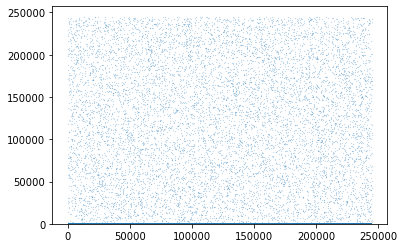

In [3]:
# Linear Congruential Generator
def lcg(i=10,n=123456,a=1597,b=51749,m=244944):
    ni = n
    u = [n]
    for _ in range(i):
        ni = (a*ni + b) % m
        u.append(ni)
    return ni, u

n, u = lcg(10000, 123456, 1597, 51749, 244944)
plt.scatter(u, np.roll(u,1), s=0.01)
plt.hist(u)

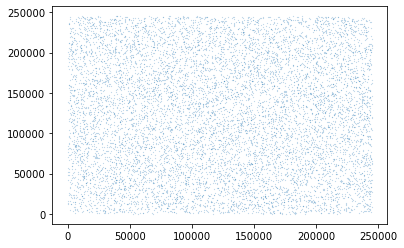

In [4]:
# Fibonacci Generator
def fibonacci(i=10,a=5,b=17,m=244944):
    _,start = lcg(b)
    for j in range(i):
        k = j + b
        start.append((start[k-a] - start[k-b]) % m)
    return start

fibs = fibonacci(10000)
plt.scatter(fibs, np.roll(fibs, 1), s=0.01)

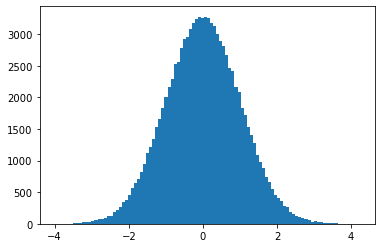

In [5]:
# Standard normal inversion
def standardNormalInverse(i, mu = 0, scale = 1):
    n,u = lcg(i,n=123456,a=1597,b=51749,m=244944)
    uniforms = np.asarray(u)/244944
    return scipy.stats.norm.ppf(uniforms, mu, scale)

samples = standardNormalInverse(100000)
plt.hist(samples,100);

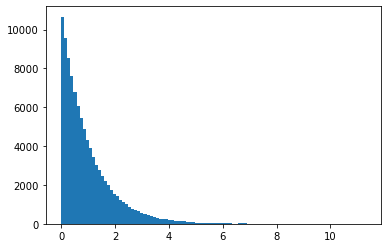

In [6]:
# Exponential inverseion
def exponInverse(i, mu=0, scale=1):
    _, u = lcg(i)
    uniforms = np.asarray(u)/244944
    return scipy.stats.expon.ppf(uniforms, mu, scale)

samples = exponInverse(100000)
plt.hist(samples,100);

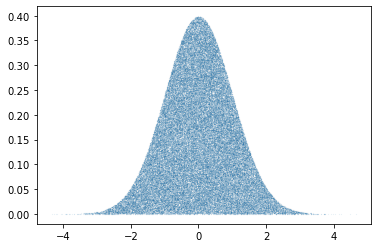

In [7]:
# Acceptance Rejection Method. Standard Normal
def accpRejNormal(i, mu = 0, scale = 1):
    X = np.random.normal(mu, scale, i)
    U = np.random.uniform(0,1,i)
    Y = U*scipy.stats.norm.pdf(X, mu, scale)
    return (X,Y)
    
(X,Y) = accpRejNormal(100000)
plt.scatter(X,Y,s=0.001)

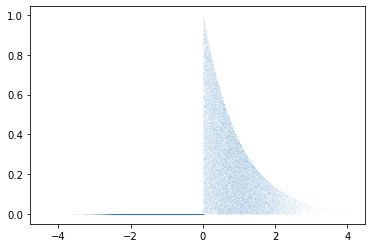

In [8]:
# Exponential Acceptance Rejection Method
def accpRejExpon(i, mu = 0, scale = 1):
    X = np.random.normal(mu, scale, i)
    U = np.random.uniform(0,1,i)
    Y = U*scipy.stats.expon.pdf(X, loc=mu, scale=scale)
    return (X,Y)

(X,Y) = accpRejExpon(100000)
plt.scatter(X,Y,s=0.0001)

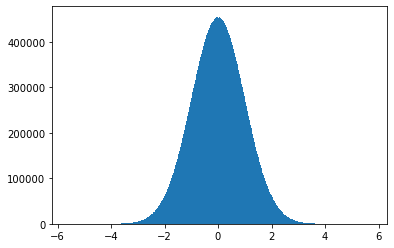

In [9]:
# Box Muller
def boxMull(i):
    U1 = np.random.uniform(0,1,i)
    U2 = np.random.uniform(0,1,i)
    theta = 2*np.pi*U2
    rho = np.sqrt(-2*np.log(U1))
    return rho*np.cos(theta)

Z = boxMull(100000000)
plt.hist(Z, 1000);

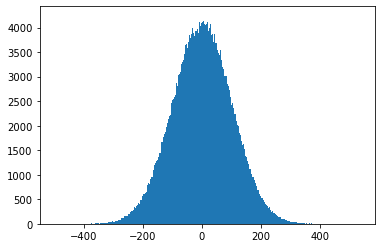

In [10]:
# Variant of Marsaglia
def singleSample():
    v1 = v2 = w = 2
    while w >= 1:
        [u1,u2] = np.random.uniform(0,1,2)
        v1 = 2*u1 - 1
        v2 = 2*u2 - 1
        w = v1**2 + v2**2
    return v1*np.sqrt(-2*np.log(w)/w)

def marsaglia(i,mu=0,sigma=1):
    samples = np.asarray([singleSample() for _ in range(i)])
    return sigma*samples + mu

samples = marsaglia(1000000,1,100)
plt.hist(samples,1000);

In [11]:
# Ziggurat Algorithm



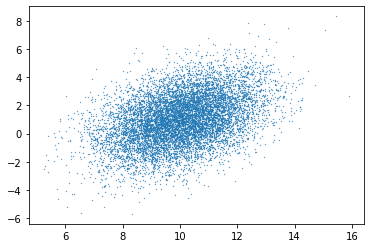

In [12]:
# Correlated Normal Variables

def corrNorm(mu1, var1, mu2, var2, corrCoeff, i):
    cov = corrCoeff*np.sqrt(var1)*np.sqrt(var2)
    covMat = [[var1, cov],[cov,var2]]
    means = [mu1,mu2]
    samples = np.random.multivariate_normal(means, covMat, i)
    Z1 = samples[:, 0]
    Z2 = samples[:, 1]
    return (Z1, Z2)

(Z1,Z2) = corrNorm(10,2,1,3,0.4,10000)
plt.scatter(Z1,Z2,s=0.1)

In [13]:
# Quasi Random numbers
# Van der Corput

def vanDerCorputSample(i):
    s = -1 if i < 0 else 1
    base_inv = 0.5
    r = 0.
    t = abs(int(i))
    while (t!= 0):
        d = t % 2
        r = r+d*base_inv
        base_inv = base_inv / 2.
        t = t // 2
    r = r*s
    return r

def vanDerCorput(i):
    return [vanDerCorputSample(j) for j in range(1,i+1)]

print(vanDerCorput(10))

[0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875, 0.0625, 0.5625, 0.3125]


In [14]:
# Halton sequence

# https://people.sc.fsu.edu/~jburkardt/py_src/halton/halton.py

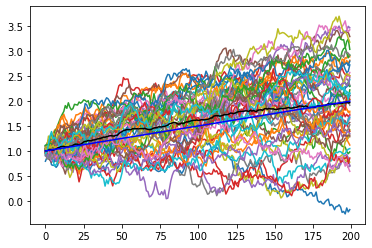

In [15]:
# Arithmetic Brownian Motion
# consider if S0 - mu

def abm(S0, mu, sigma, nsteps=200, nsims=50):
    T = 1
    dt = T/nsteps
    dX = mu*dt + sigma*np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    X = S0 + np.cumsum(dX, axis=1)
    E = S0 + mu*np.linspace(0,T,nsteps)
    return X,E

samples, E = abm(1,1,1)
for j in range(50):
    plt.plot(samples[j])
mean = np.mean(samples, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue');

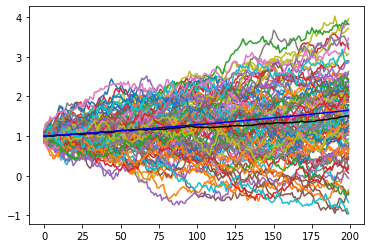

In [16]:
# Geometric Brownian Motion
# dSt = mu St dt + sigma St dwt
# dSt = St(mu*dt + sigma*dWt)

def gbm(S0, mu, sigma, nsteps=200, nsims=50):
    T = 1
    dt = T/nsteps
    dX = (mu-0.5*sigma**2)*dt + sigma*np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    S = S0+S0*np.cumsum(dX, axis=1)
    t = np.linspace(0,T,nsteps)
    E = S0*np.exp((mu - 0.5*sigma)*t)
    return (S,E)

samples, E = gbm(1,1,1,200,100)
for j in range(100):
    plt.plot(samples[j])
mean = np.mean(samples, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue')

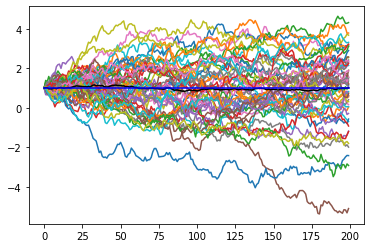

In [17]:
# Ornstein-Uhlenbeck process
# dX = -theta*(mu - x)*dt + sigma*dW

def ou(S0, mu, sigma, theta, nsteps=200, nsims=50):
    T = 1
    dt = T/nsteps
    sig_dw = sigma*np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    t = np.linspace(0,T,nsteps)
    
    E = np.exp(-theta*t)*S0 + mu*(1-np.exp(-theta*t))
    Y = np.empty((nsims, nsteps))
    
    for j in range(nsims):
        Y[j][0] = S0
        for i in range(1,nsteps):
            Y[j][i] = Y[j][i-1] + theta*(mu - Y[j][i-i])*dt + sig_dw[j][i]
    return Y,E

Y,E = ou(1,1,2,0.4)
for i in range(50):
    plt.plot(Y[i])

mean = np.mean(Y, axis=0)
plt.plot(mean, color='black')
plt.plot(E, color='blue')

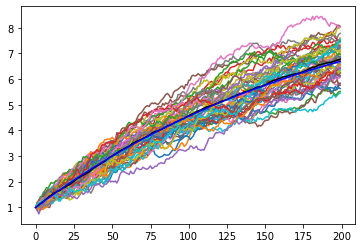

In [18]:
# CIR Feller Condition
# yj+1 = yj + kappa(theta-yj)dt + sigma*sqrt(yi)dW

def feller(S0, kappa, theta, sigma, nsims=50, nsteps=200):
    T = 1
    dt = T/nsteps
    t = np.linspace(0,T,nsteps)
    dW = np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    Y = np.empty((nsims,nsteps))
    E = np.exp(-kappa*t)*S0 + theta*(1-np.exp(-kappa*t))

    for j in range(nsims):
        Y[j][0] = S0
        for i in range(1,nsteps):
            Y[j][i] = Y[j][i-1] + kappa*(theta-Y[j][i-1])*dt + sigma*dW[j][i]
    return Y, E

Y,E = feller(1,1,10,1)
for i in range(50):
    plt.plot(Y[i])
mean = np.mean(Y, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue')

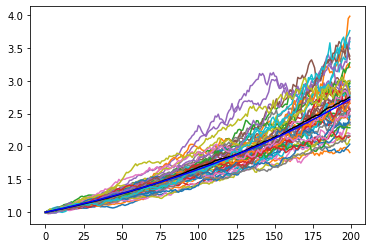

In [19]:
# Constant Elasticity of Variance Model
# dX = mu*X*dt + sigma*X**(beta+1)dW

def cev(S0, mu, sigma, beta, nsteps=200, nsims=50):
    T = 1
    dt = T/nsteps
    dW = np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    Y = np.empty((nsims,nsteps))
    E = S0*np.exp(mu*np.linspace(0,T,nsteps))

    for j in range(nsims):
        Y[j][0] = S0
        for i in range(1,nsteps):
            Y[j][i] = Y[j][i-1] + mu*Y[j][i-1]*dt + sigma*Y[j][i-1]**(beta+1)*dW[j][i]
    return Y, E

Y,E = cev(1,1,0.1,1)
for i in range(50):
    plt.plot(Y[i])
mean = np.mean(Y, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue')


C:\Users\Henry\miniconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Henry\miniconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


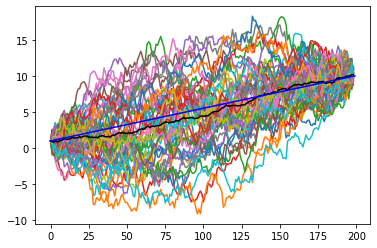

In [20]:
# Brownian Bridge
# dX = (ST-X)/(T-t)*dt + sigma*dW

def bb(S0,ST,sigma, nsims=50, nsteps=200):
    T = 1
    dt = T/nsteps
    t = np.linspace(0,T,nsteps)
    dW = np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    E = S0 + (ST-S0)*(np.linspace(0,T,nsteps))/(T)
    Y = np.empty((nsims,nsteps))
    for j in range(nsims):
        Y[j][0]= S0
        for i in range(1,nsteps):
            y = Y[j][i-1]
            Y[j][i] = y + (ST-y)/(T-t[i])*dt + sigma*dW[j][i]
    return Y, E

Y,E = bb(1,10,10)
for i in range(50):
    plt.plot(Y[i])
mean = np.mean(Y, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue')

C:\Users\Henry\miniconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
C:\Users\Henry\miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


(50, 200)


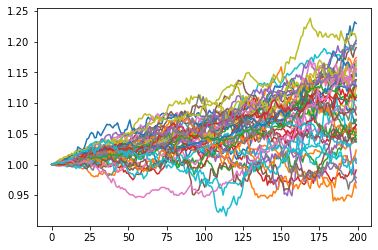

In [21]:
# Heston Stochastic Volatility Model
# dv = kappa*(theta-v)dt + xi*sqrt(v)*dW
# ds = mu*S*dt + sqrt(v)*S*dW

def hsv(S0, V0, kappa, theta, xi, mu, nsims=50, nsteps=200):
    T = 1
    dt = T/nsteps
    dW1 = np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    dW2 = np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    
    V = np.empty((nsims,nsteps))
    for j in range(nsims):
        V[j][0] = 0
        for i in range(1,nsteps):
            v = V[j][i-1]
            V[j][i] = v + kappa*(theta-v)*dt + xi*np.sqrt(v)*dW1[j][i]
    
    S = np.empty((nsims,nsteps))
    for j in range(nsims):
        S[j][0] = S0
        for i in range(1,nsteps):
            s = S[j][i-1] 
            S[j][i] = s + mu*s*dt + np.sqrt(V[j][i])*s*dW2[j][i]
    
    return S

S = hsv(1,10,0.1,0.1,0.1,0.1);
print(S.shape)
for j in range(50):
    plt.plot(S[j]);

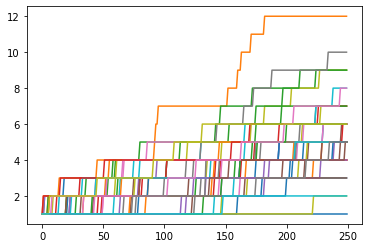

In [22]:
# Poisson Jump Diffusion

def poissonJump(S0, jump, lmbda, nsims = 50, nsteps = 250):
    T = 1
    dt = T/nsteps
    
    P = np.random.poisson(lmbda*dt, (nsims,nsteps))
    jumps = P*jump
    Y = np.cumsum(jumps, axis=1) + S0
    return Y

Y = poissonJump(1,1,5)
for j in range(50):
    plt.plot(Y[j])

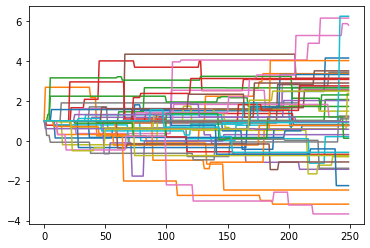

In [23]:
# Poisson Normal Jump Diffusion

def poissonJumpGauss(S0, mu, sigma, lmbda, nsims = 50, nsteps = 250):
    T = 1
    dt = T/nsteps
    P = np.random.poisson(lmbda*dt, (nsims,nsteps))
    jumps = P*np.random.normal(mu, sigma, (nsims, nsteps))
    Y = S0 + np.cumsum(jumps, axis=1)
    return Y

Y = poissonJumpGauss(1,0,1,5)
for j in range(50):
    plt.plot(Y[j])

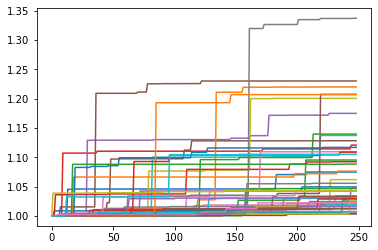

In [24]:
# Gamma process
# Gamma Jump Sizes

def gammaJump(S0, mu, sigma, jump, nsims=50, nsteps=250):
    T = 1
    dt = T/nsteps
    jumps = np.random.gamma(mu*dt, sigma*np.sqrt(dt), (nsims,nsteps-1))*jump
    zeros = np.zeros(nsims)
    jumps [:,0] = zeros
    Y = S0 + np.cumsum(jumps,axis=1)
    return Y

Y = gammaJump(1,1,1,1)
for i in range(50):
    plt.plot(Y[i])

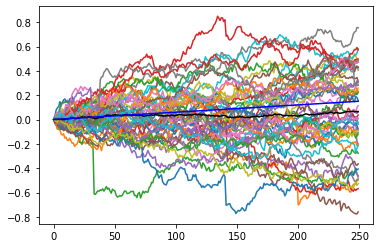

In [25]:
# Merton Jump Diffusion
# X(t) = (muS-0.5*sigma^2)*t + sigma*W(t) + sum_{i=1}^{N(t)}Z_i

def mjd(S0, mu, sigma, lmbda, mu_z, sigma_z, nsims=50, nsteps=250):
    T = 1
    dt = T/nsteps
    Y = np.empty((nsims,nsteps))
    P = np.random.poisson(lmbda*dt, (nsims,nsteps))
    Z = np.random.normal(mu_z, sigma_z, (nsims,nsteps))
    dW = np.random.normal(0,1,(nsims,nsteps))*np.sqrt(dt)
    jumps = P*Z
    E = np.cumsum(np.ones(nsteps)*(mu + lmbda*mu_z))*dt
    
    for j in range(nsims):
        Y[j][0] = 0
        for i in range(1,nsteps):
            t = i/nsteps
            Y[j][i] = Y[j][i-1] + (mu-0.5*sigma**2)*dt + sigma*dW[j][i] + jumps[j][i]
    return Y,E

Y,E = mjd(1, 0.2, 0.3, 0.5, -0.1, 0.15)
for j in range(50):
    plt.plot(Y[j])
mean = np.mean(Y, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue');

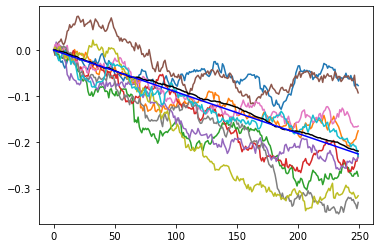

In [26]:
# Kou diffusion

def kou(S0, mu, sigma, lmbda, p, eta1, eta2, nsims = 50, nsteps = 250):
    T = 1
    dt = T/nsteps
    Y = np.empty((nsims, nsteps))
    trials = np.random.binomial(1, p, (nsims, nsteps))
    trials = np.where(trials == 0, -1, trials)
    poissonTrials = np.random.poisson(lmbda, (nsims, nsteps))
    jumps = trials*poissonTrials
    dW = np.random.normal(0,1,(nsims, nsteps))*np.sqrt(dt)
    E = np.cumsum(dt*np.ones(nsteps)*(mu + lmbda*((p/eta1) - ((1-p)/eta2))))
    for j in range(nsims):
        Y[j][0] = S0
        for i in range(1, nsteps):
            jumpVal = 0
            if (jumps[j][i] > 0):
                jumpVal = jumps[j][i]*np.random.exponential(1/eta1, 1)[0]
            elif (jumps[j][i] < 0):
                jumpVal = jumps[j][i]*np.random.exponential(1/eta2, 1)[0]
            Y[j][i] = Y[j][i-1] + mu*dt + sigma*dW[j][i] + jumpVal*dt
    return Y,E

Y,E = kou(0,0,0.1,0.5,0.5,10,1,100)

for i in range(10):
    plt.plot(Y[i])

mean = np.mean(Y, axis=0)
plt.plot(mean, color='black');
plt.plot(E, color='blue')

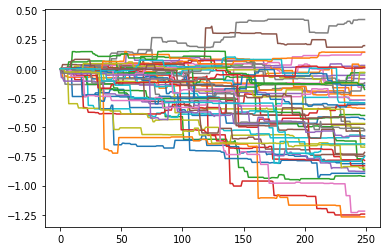

In [27]:
# Time changed arithmetic Brownian motion. The variance gamma process

nsimulations = 50
nsteps = 250
T = 1
dt = T/nsteps

theta = -0.5
sigma = 0.3
kappa = 0.25
S0 = 0

Y = np.empty((nsimulations, nsteps))
gammas = np.random.gamma(dt/kappa, kappa, (nsimulations,nsteps))
normals = np.random.normal(0,1,(nsimulations,nsteps))

for j in range(nsimulations):
    Y[j][0] = S0
    for i in range(1, nsteps):
        y = Y[j][i-1]
        gamma = gammas[j][i]
        normal = normals[j][i]
        Y[j][i] = y + theta*gamma + sigma*np.sqrt(gamma)*normal
    plt.plot(Y[j])

In [28]:
# Analytical options pricing
# Underlying model is a geometric Brownian motion
# dS = mu*S*dt + sigma*S*dW

# Market parameters
T = 1
S0 = 1
K = 1.1
r = 0.05
q = 0.02

sigma = 0.4

# Risk neutral measure
muRN = r-q+0.5*sigma**2

d1 = (np.log(S0/K) + muRN*(T))/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

Vcall = S0*np.exp(-q*T)*scipy.stats.norm.cdf(d1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d2)
Vput = K*np.exp(-r*T)*scipy.stats.norm.cdf(-d2) - S0*np.exp(-q*T)*scipy.stats.norm.cdf(-d1)

print(Vcall)
print(Vput)

0.12965401324786407
0.19580770689189425


C:\Users\Henry\miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


0.02175138099172877
0.003110121519519192


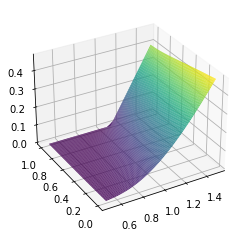

In [29]:
# Plot across S and t (for T-t)

S0 = np.linspace(0.5, 1.5, 100)
tspace = np.linspace(0,1,100)
results = np.empty((len(S0),len(tspace)))

T = 1
K = 1.1
r = 0.05
q = 0.02

sigma = 0.4

# Risk neutral measure
muRN = r-q+0.5*sigma**2
for j in range(len(S0)):
    S = S0[j]
    for i in range(len(tspace)):
        t = tspace[i]
        d1 = (np.log(S/K) + muRN*(T-t))/(sigma*np.sqrt(T-t))
        d2 = d1 - sigma*np.sqrt(T-t)

        Vcall = S*np.exp(-q*(T-t))*scipy.stats.norm.cdf(d1) - K*np.exp(-r*(T-t))*scipy.stats.norm.cdf(d2)
        results[i][j] = Vcall

print(results[9][20])
print(results[9][2])
S0, tspace = np.meshgrid(S0, tspace)
ax = plt.axes(projection='3d')
ax.plot_surface(S0, tspace, results, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(30, -120)


In [30]:
# Monte Carlo options pricing

T = 1
S0 = 1
K = 1.1
r = 0.05
q = 0.02

nblocks = 2000
nsample = 1000

muRN = r-q-0.5*sigma**2

VcMCb = np.empty(nblocks)
VpMCb = np.empty(nblocks)

for i in range(nblocks):
    # Arithmetic brownian motion
    X = muRN*T + sigma*np.random.normal(0,1,nsample)*np.sqrt(T)
    
    # Transform to geometric brownian motion
    S = S0*np.exp(X)
    
    # Discounted expected payoff
    maxVec = np.vectorize(lambda x : max(x,0), otypes=[np.float64])
    SK = maxVec(S - K)
    KS = maxVec(K - S)
    VcMCb[i] = np.exp(-r*T)*np.mean(SK)
    VpMCb[i] = np.exp(-r*T)*np.mean(KS)

VcMC = np.mean(VcMCb)
VpMC = np.mean(VpMCb)
print(VcMC)
print(VpMC)

0.12943917428339757
0.19592684071996322


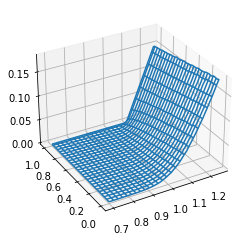

In [31]:
# Monte Carlo options plotting

T = 1
S0 = 1
K = 1.1
r = 0.05
q = 0.02
sigma = 0.1

nblocks = 200
nsample = 100

muRN = r-q-0.5*sigma**2

VcMCb = np.empty(nblocks)
VpMCb = np.empty(nblocks)

Srange = np.linspace(0.7,1.25,50)
Trange = np.linspace(0,1,50)
Z = np.empty((50,50))

for indexs, s in enumerate(Srange):
    for indext, t in enumerate(Trange):
        for i in range(nblocks):
            # Arithmetic brownian motion
            X = muRN*(T-t) + sigma*np.random.normal(0,1,nsample)*np.sqrt(T-t)

            # Transform to geometric brownian motion
            S = s*np.exp(X)

            # Discounted expected payoff
            maxVec = np.vectorize(lambda x : max(x,0), otypes=[np.float64])
            SK = maxVec(S - K)
            KS = maxVec(K - S)
            VcMCb[i] = np.exp(-r*(T-t))*np.mean(SK)
            VpMCb[i] = np.exp(-r*(T-t))*np.mean(KS)

        VcMC = np.mean(VcMCb)
        Z[indext][indexs] = VcMC
        VpMC = np.mean(VpMCb)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Srange,Trange = np.meshgrid(Srange, Trange)
ax.plot_wireframe(Srange, Trange, Z, rstride=2, cstride=2)
ax.view_init(30, -120)


In [32]:
# Monte Carlo binary options pricing

# Monte Carlo options pricing

T = 1
S0 = 1
K = 1.1
r = 0.05
q = 0.02

nblocks = 2000
nsample = 1000

muRN = r-q-0.5*sigma**2

VcMCb = np.empty(nblocks)
VpMCb = np.empty(nblocks)

for i in range(nblocks):
    # Arithmetic brownian motion
    X = muRN*T + sigma*np.random.normal(0,1,nsample)*np.sqrt(T)
    
    # Transform to geometric brownian motion
    S = S0*np.exp(X)
    
    # Discounted expected payoff
    maxVec = np.vectorize(lambda x : 1 if x > 0 else 0, otypes=[np.float64])
    SK = maxVec(S - K)
    KS = maxVec(K - S)
    VcMCb[i] = np.exp(-r*T)*np.mean(SK)
    VpMCb[i] = np.exp(-r*T)*np.mean(KS)

VcMC = np.mean(VcMCb)
VpMC = np.mean(VpMCb)
print(VcMC)
print(VpMC)

0.22924153515754958
0.7219878893431644


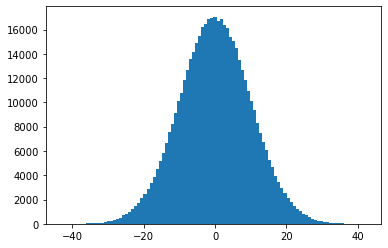

In [50]:
# Check numerically that Gaussians form a closed set with respect to
# the Fourier transform

def gaussianFT(mu1, sigma1, mu2, sigma2, nsims = 500000):
    T = 1
    dt = T/nsteps
    Z1 = np.random.normal(mu1, sigma1, nsims)
    Z2 = np.random.normal(mu2, sigma2, nsims)
    
    Z1ft = np.fft.fft(Z1,axis=0)
    Z2ft = np.fft.fft(Z1,axis=0)
    
    product = Z1ft*Z2ft
    return np.fft.ifft(product,axis=0)
    
Y = gaussianFT(0,0.1,0,0.1)

plt.hist(Y, 100);

In [36]:
# Pricing in Fourier space
from numpy.fft import fftshift , ifftshift, fft
from scipy.interpolate import interp1d

# contract params
T = 1 # maturity
K = 1.1 # strike price

# market params
S0 = 1 # spot price
r = 0.05 # risk free interest rate
q = 0.02 # dividend rate

# model params
sigma = 0.4 # volatility

# Monte Carlo parameters; npaths = nblocks*nsample
nblocks = 20000 # number of blocks
nsample = 10000 # number of samples per block

muABM = r-q-0.5*sigma**2 # drift coefficient of the arithmetic Brownian motion

# Fourier parameters
xwidth = 6 # width of the support in real space
ngrid = 2**8 # number of grid points
alpha = -10 # damping factor for a call

N = ngrid/2
b = xwidth/2 # upper bound of the support in real space
dx = xwidth/ngrid # grid step in real space
x = dx* np.arange(start = -N,stop = N-1,step = 1) # grid in real space
dxi = np.pi/b # Nyquist relation: grid step in Fourier space
xi = dxi*np.arange(start = -N,stop = N-1,step = 1) # grid in Fourier space

# Characteristic function at time T
xia = xi+1j*alpha # call
psi = 1j*muABM*xia-0.5*(sigma*xia)**2 # characteristic exponent
Psic = np.exp(psi*T) # characteristic function
xia = xi-1j*alpha # put
psi = 1j*muABM*xia-0.5*(sigma*xia)**2 # characteristic exponent
Psip = np.exp(psi*T) # characteristic function

U = S0*np.exp(b)
L = S0*np.exp(-b)

# Fourier transform of the payoff
b = xwidth/2 # upper bound of the support in real space
U = S0*np.exp(b)
L = S0*np.exp(-b)

S = S0*np.exp(x)
alpha = -10
theta = 1 # call option flag

def payoff(x,xi,alpha,K,L,U,C,theta):
    # scale
    S = C * np.exp(x)
    # payoff
    g = np.exp(alpha*x)*np.maximum(theta*(S-K),0)*[(S>=L)&(S<=U)]
    # Analytical Fourier transform of the payoff
    l = np.log(L/C) # lower log barrier
    k = np.log(K/C) # log strike
    u = np.log(U/C) # upper log barrier

    if theta == 1:
        a = max(l,k)
        b = u
    else:
        a = min(k,u)
        b = l
    xi2 = alpha+1j*xi
    G = S0*((np.exp(b*(1+xi2))-np.exp(a*(1+xi2)))/(1+xi2) - (np.exp(k+b*xi2)-np.exp(k+a*xi2))/xi2)
    return S,g,G

_,gc,Gc = payoff(x,xi,alpha,K,L,U,S0,1); # call
c = np.exp(-r*T)*np.real(fftshift(fft(ifftshift(Gc*np.conj(Psic)))))/xwidth; # call
fc = interp1d(S, c,'cubic')
c_val = fc(S0)

_,gp,Gp = payoff(x,xi,-alpha,K,L,U,S0,0) # put
p = np.exp(-r*T)*np.real(fftshift(fft(ifftshift(Gp*np.conj(Psip)))))/xwidth; # call
fp = interp1d(S, p,'cubic')
p_val = fp(S0)
print(c_val,p_val)
# 0.11214560372497369 0.23369662490676207
# expected  0.129654 0.195807

0.11214560372497369 0.23369662490676207
